In [1]:
from dataset_functions import *
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, KernelPCA
from sklearn.preprocessing import StandardScaler

df, target = get_dataset()

Filtering Df:  (game_mode == 2 or game_mode == 22) and game_time > 0 

Dropped:  ['lobby_type', 'chat_len', 'game_mode', 'match_id_hash'] 

Dataframe Shape:  (32153, 242) 

Target shape: (32153, 6)


# Position Density Plot

Max Coor: 188
Min Coor: 66


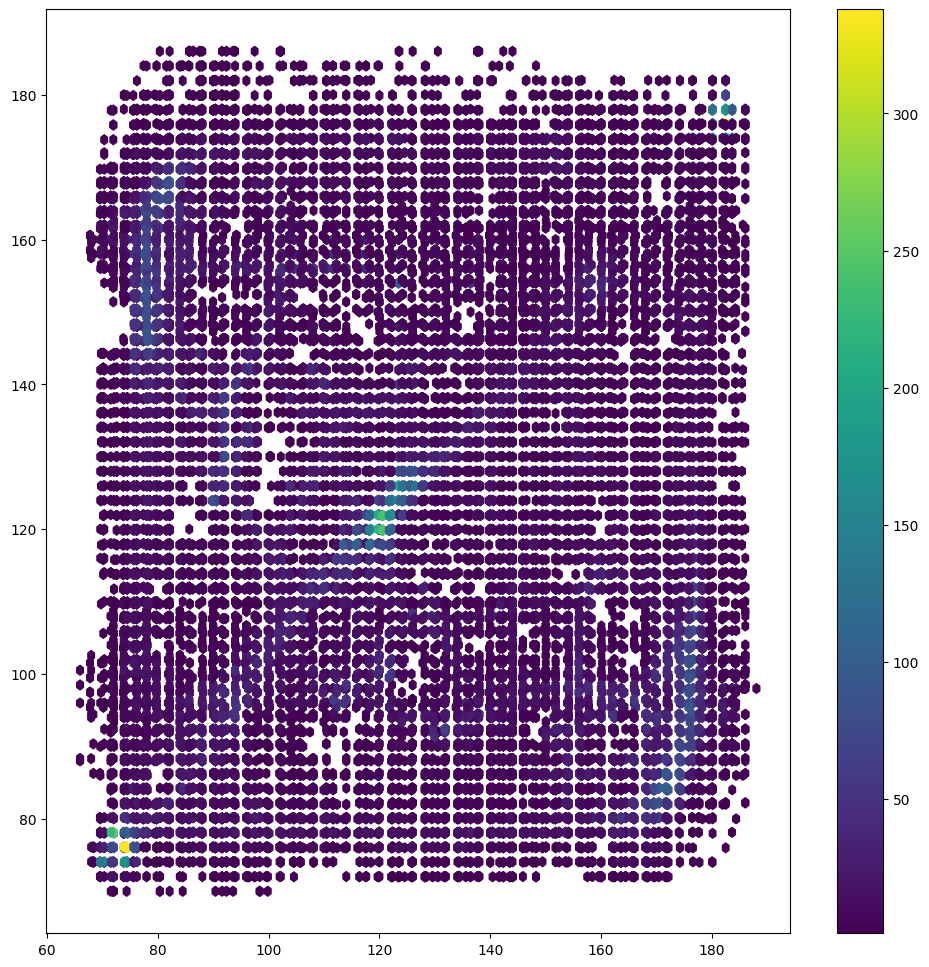

Number of Odd Coordinate: 0


In [ ]:
max_coor = []
min_coor = []

for i in range(5):
    max_coor.append(df[f"d{i+1}_x"].max())
    max_coor.append(df[f"d{i+1}_y"].max())
    max_coor.append(df[f"r{i+1}_x"].max())
    max_coor.append(df[f"r{i+1}_y"].max())
    min_coor.append(df[f"d{i+1}_x"].min())
    min_coor.append(df[f"d{i+1}_y"].min())
    min_coor.append(df[f"r{i+1}_x"].min())
    min_coor.append(df[f"r{i+1}_y"].min())

print("Max Coor:",np.max(max_coor))
print("Min Coor:",np.min(min_coor))

df_early = df#df.query("game_time < 31 and game_time >19")

plt.figure(figsize=(12,12))
plt.hexbin(df_early["d1_x"],df_early["d1_y"],mincnt=1)#,c="blue")
plt.hexbin(df_early["d2_x"],df_early["d2_y"],mincnt=1)#,c="blue")
plt.hexbin(df_early["d3_x"],df_early["d3_y"],mincnt=1)#,c="blue")
plt.hexbin(df_early["d4_x"],df_early["d4_y"],mincnt=1)#,c="blue")
plt.hexbin(df_early["d5_x"],df_early["d5_y"],mincnt=1)#,c="blue")
plt.hexbin(df_early["r1_x"],df_early["r1_y"],mincnt=1)#,c="red")
plt.hexbin(df_early["r2_x"],df_early["r2_y"],mincnt=1)#,c="red")
plt.hexbin(df_early["r3_x"],df_early["r3_y"],mincnt=1)#,c="red")
plt.hexbin(df_early["r4_x"],df_early["r4_y"],mincnt=1)#,c="red")
plt.hexbin(df_early["r5_x"],df_early["r5_y"],mincnt=1)#,c="red")
plt.colorbar()
plt.show()

print("Number of Odd Coordinate:",np.sum([(df["d3_y"] % 2) == 1]))

# Hero Popularity

Hero Id Labels: ['r1_hero_id', 'r2_hero_id', 'r3_hero_id', 'r4_hero_id', 'r5_hero_id', 'd1_hero_id', 'd2_hero_id', 'd3_hero_id', 'd4_hero_id', 'd5_hero_id'] 



array([[<Axes: title={'center': 'r1_hero_id'}>,
        <Axes: title={'center': 'r2_hero_id'}>],
       [<Axes: title={'center': 'r3_hero_id'}>,
        <Axes: title={'center': 'r4_hero_id'}>],
       [<Axes: title={'center': 'r5_hero_id'}>,
        <Axes: title={'center': 'd1_hero_id'}>],
       [<Axes: title={'center': 'd2_hero_id'}>,
        <Axes: title={'center': 'd3_hero_id'}>],
       [<Axes: title={'center': 'd4_hero_id'}>,
        <Axes: title={'center': 'd5_hero_id'}>]], dtype=object)

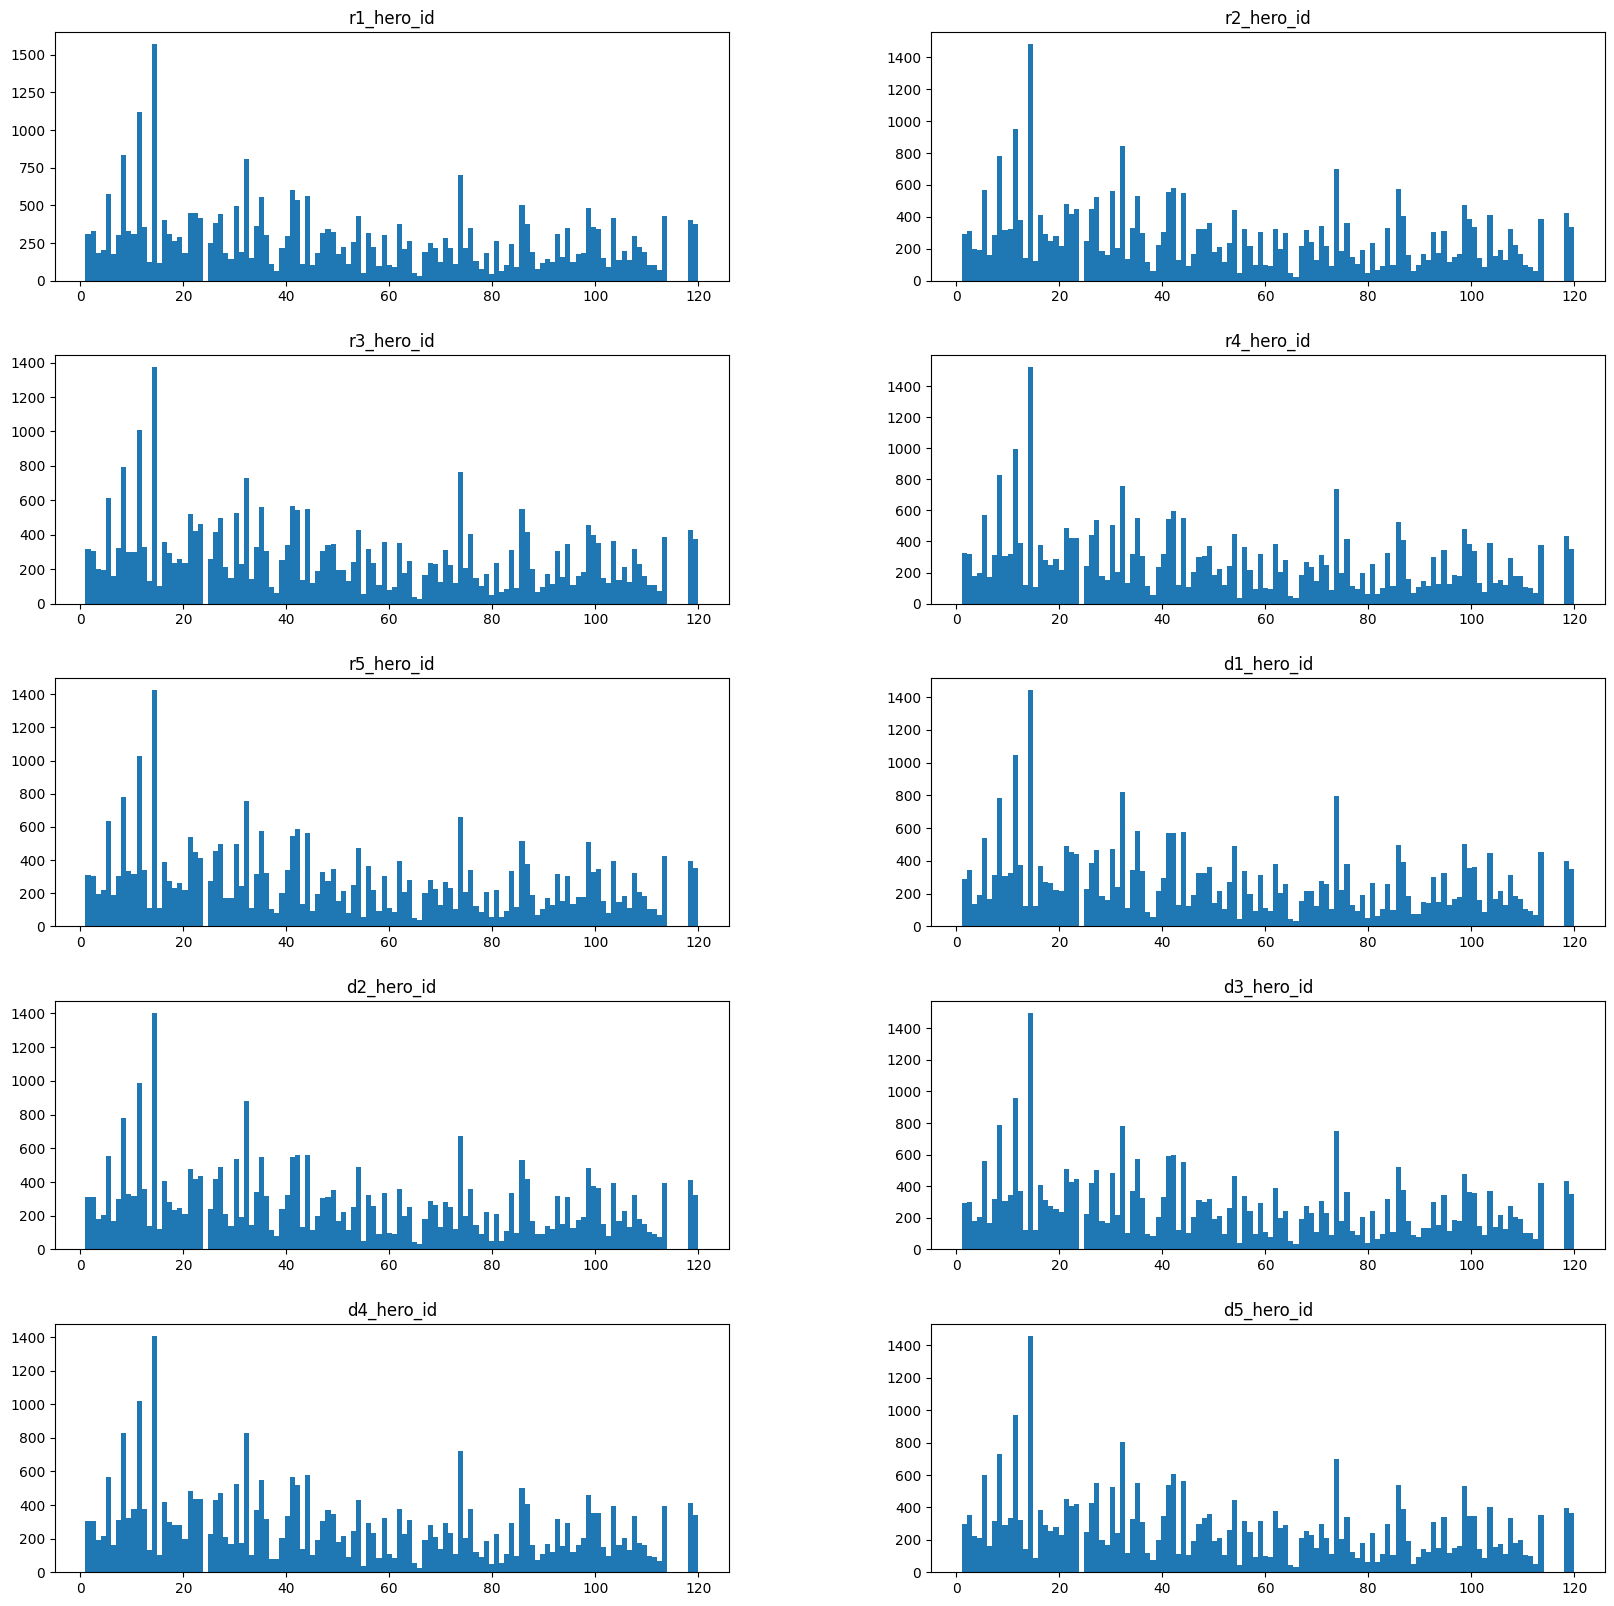

In [5]:
hero_id_labels = get_hero_id_labels(df)

df[hero_id_labels].hist(
    layout=[5,2],
    figsize=(20,20),
    bins=120,
    grid=False
)

# Dataset Correlation

In [20]:
df_psph = playerstats_playerheros_transform(df)

(32153, 6)


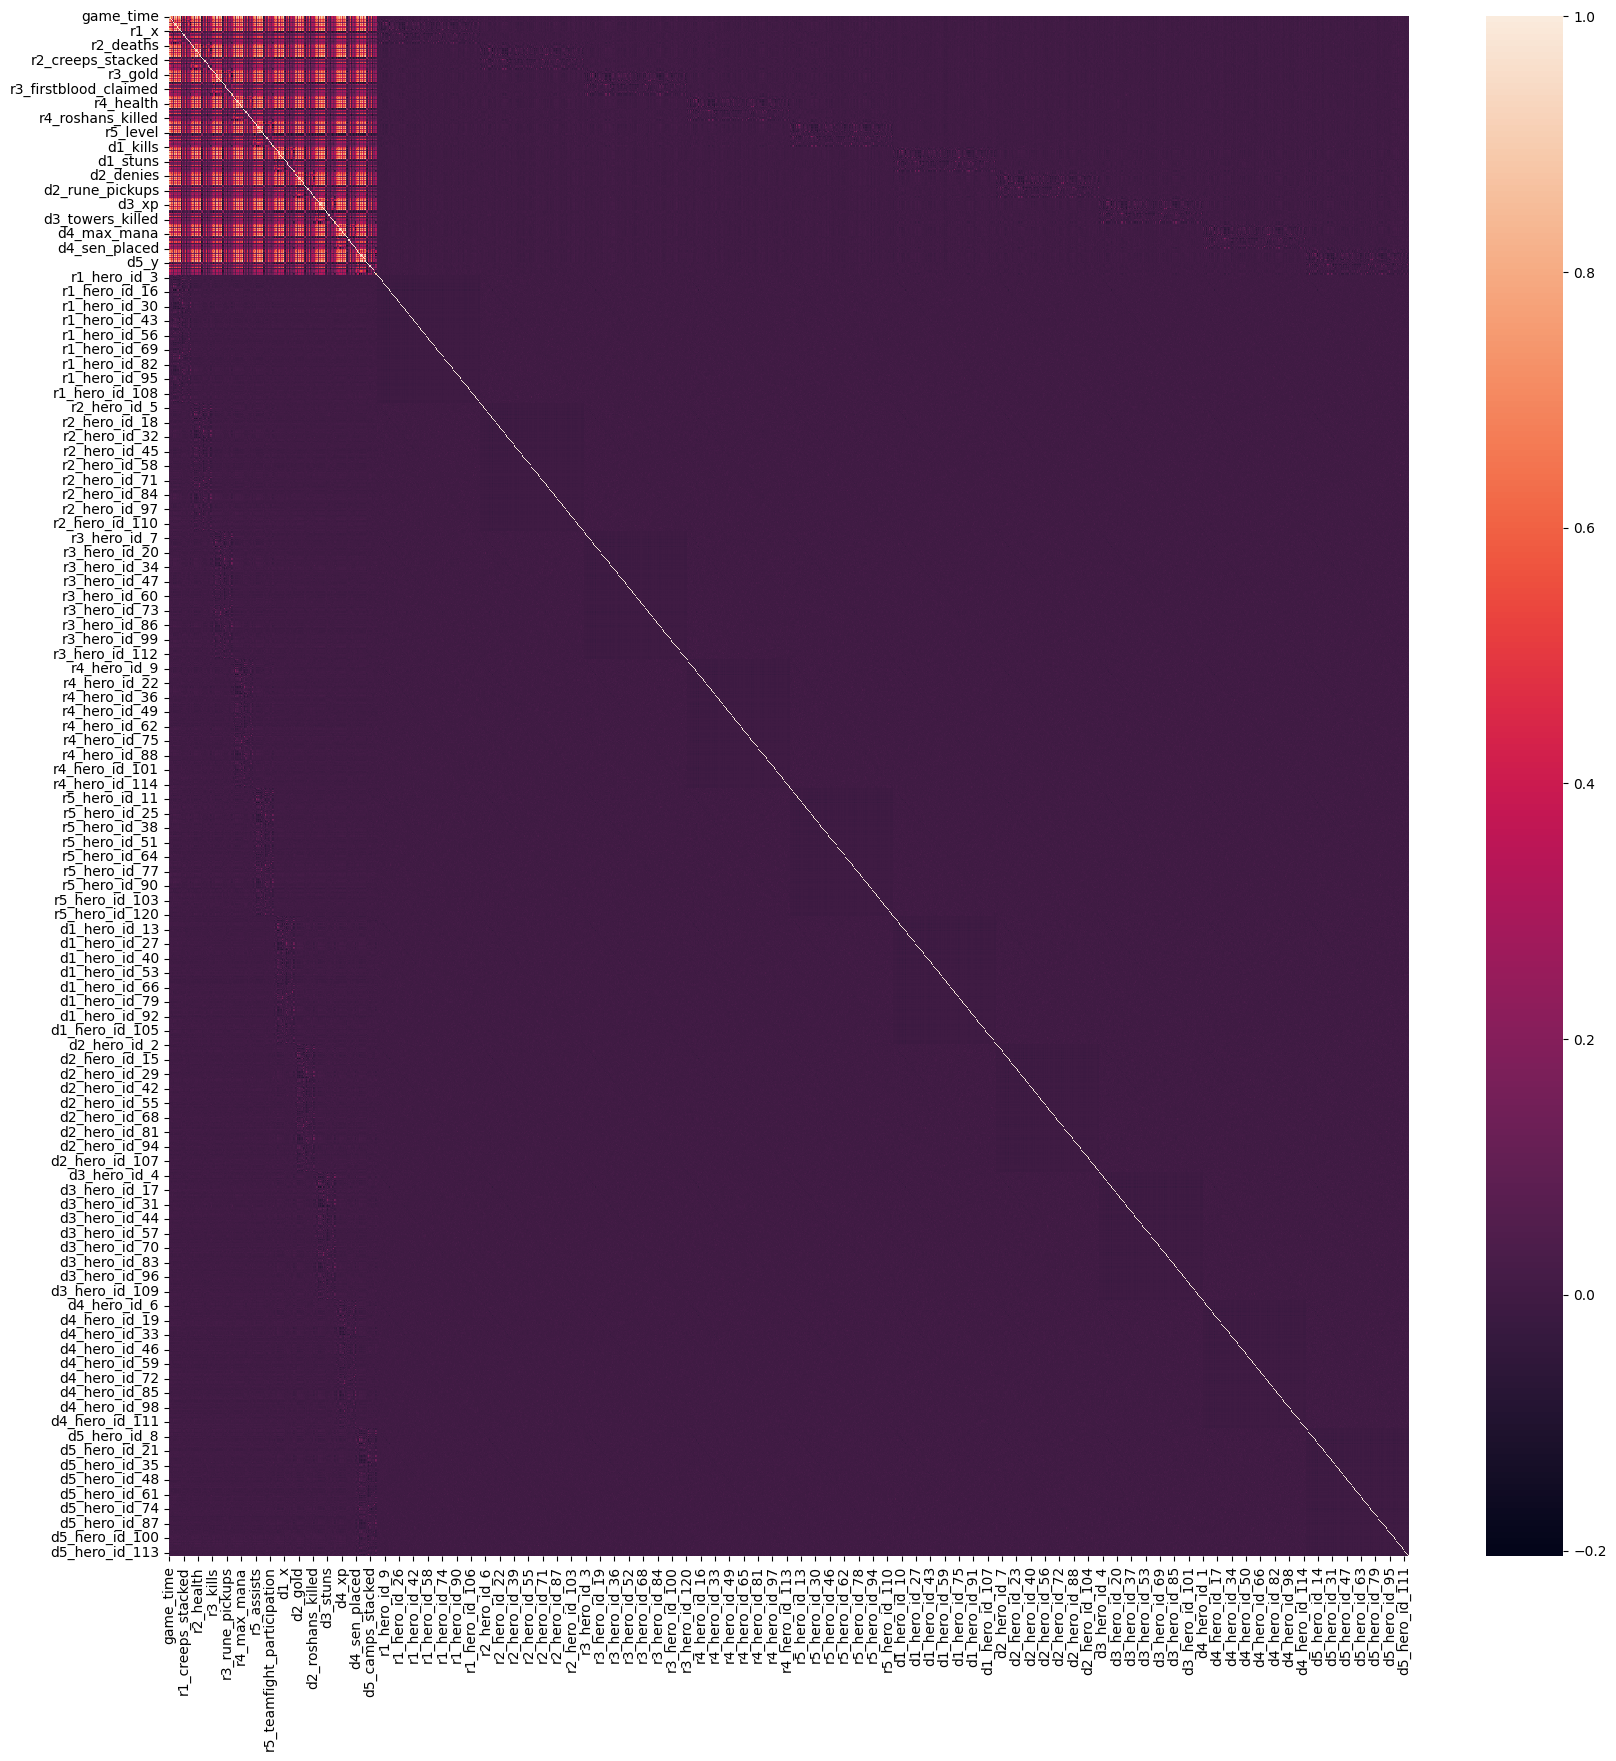

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(df_psph.corr())
plt.show()

In [21]:
df_psth = playerstats_teamheros_transform(df)

Hero Id Labels: ['r1_hero_id', 'r2_hero_id', 'r3_hero_id', 'r4_hero_id', 'r5_hero_id', 'd1_hero_id', 'd2_hero_id', 'd3_hero_id', 'd4_hero_id', 'd5_hero_id'] 

Numbers of Heros:  115 

Dataframe Shape: (32153, 462) 

NaN Count:  0 



Hero Id Labels: ['r1_hero_id', 'r2_hero_id', 'r3_hero_id', 'r4_hero_id', 'r5_hero_id', 'd1_hero_id', 'd2_hero_id', 'd3_hero_id', 'd4_hero_id', 'd5_hero_id'] 

Numbers of Heros:  115 

Dataframe Shape: (32153, 473) 

NaN Count:  0 



c:\Users\panal\VSCode\ML-Project\code\dataset_functions.py:104: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  (df["r4_hero_id"] == hero_id) |
c:\Users\panal\VSCode\ML-Project\code\dataset_functions.py:97: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)
c:\Users\panal\VSCode\ML-Project\code\dataset_functions.py:104: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performa

(32153, 6)


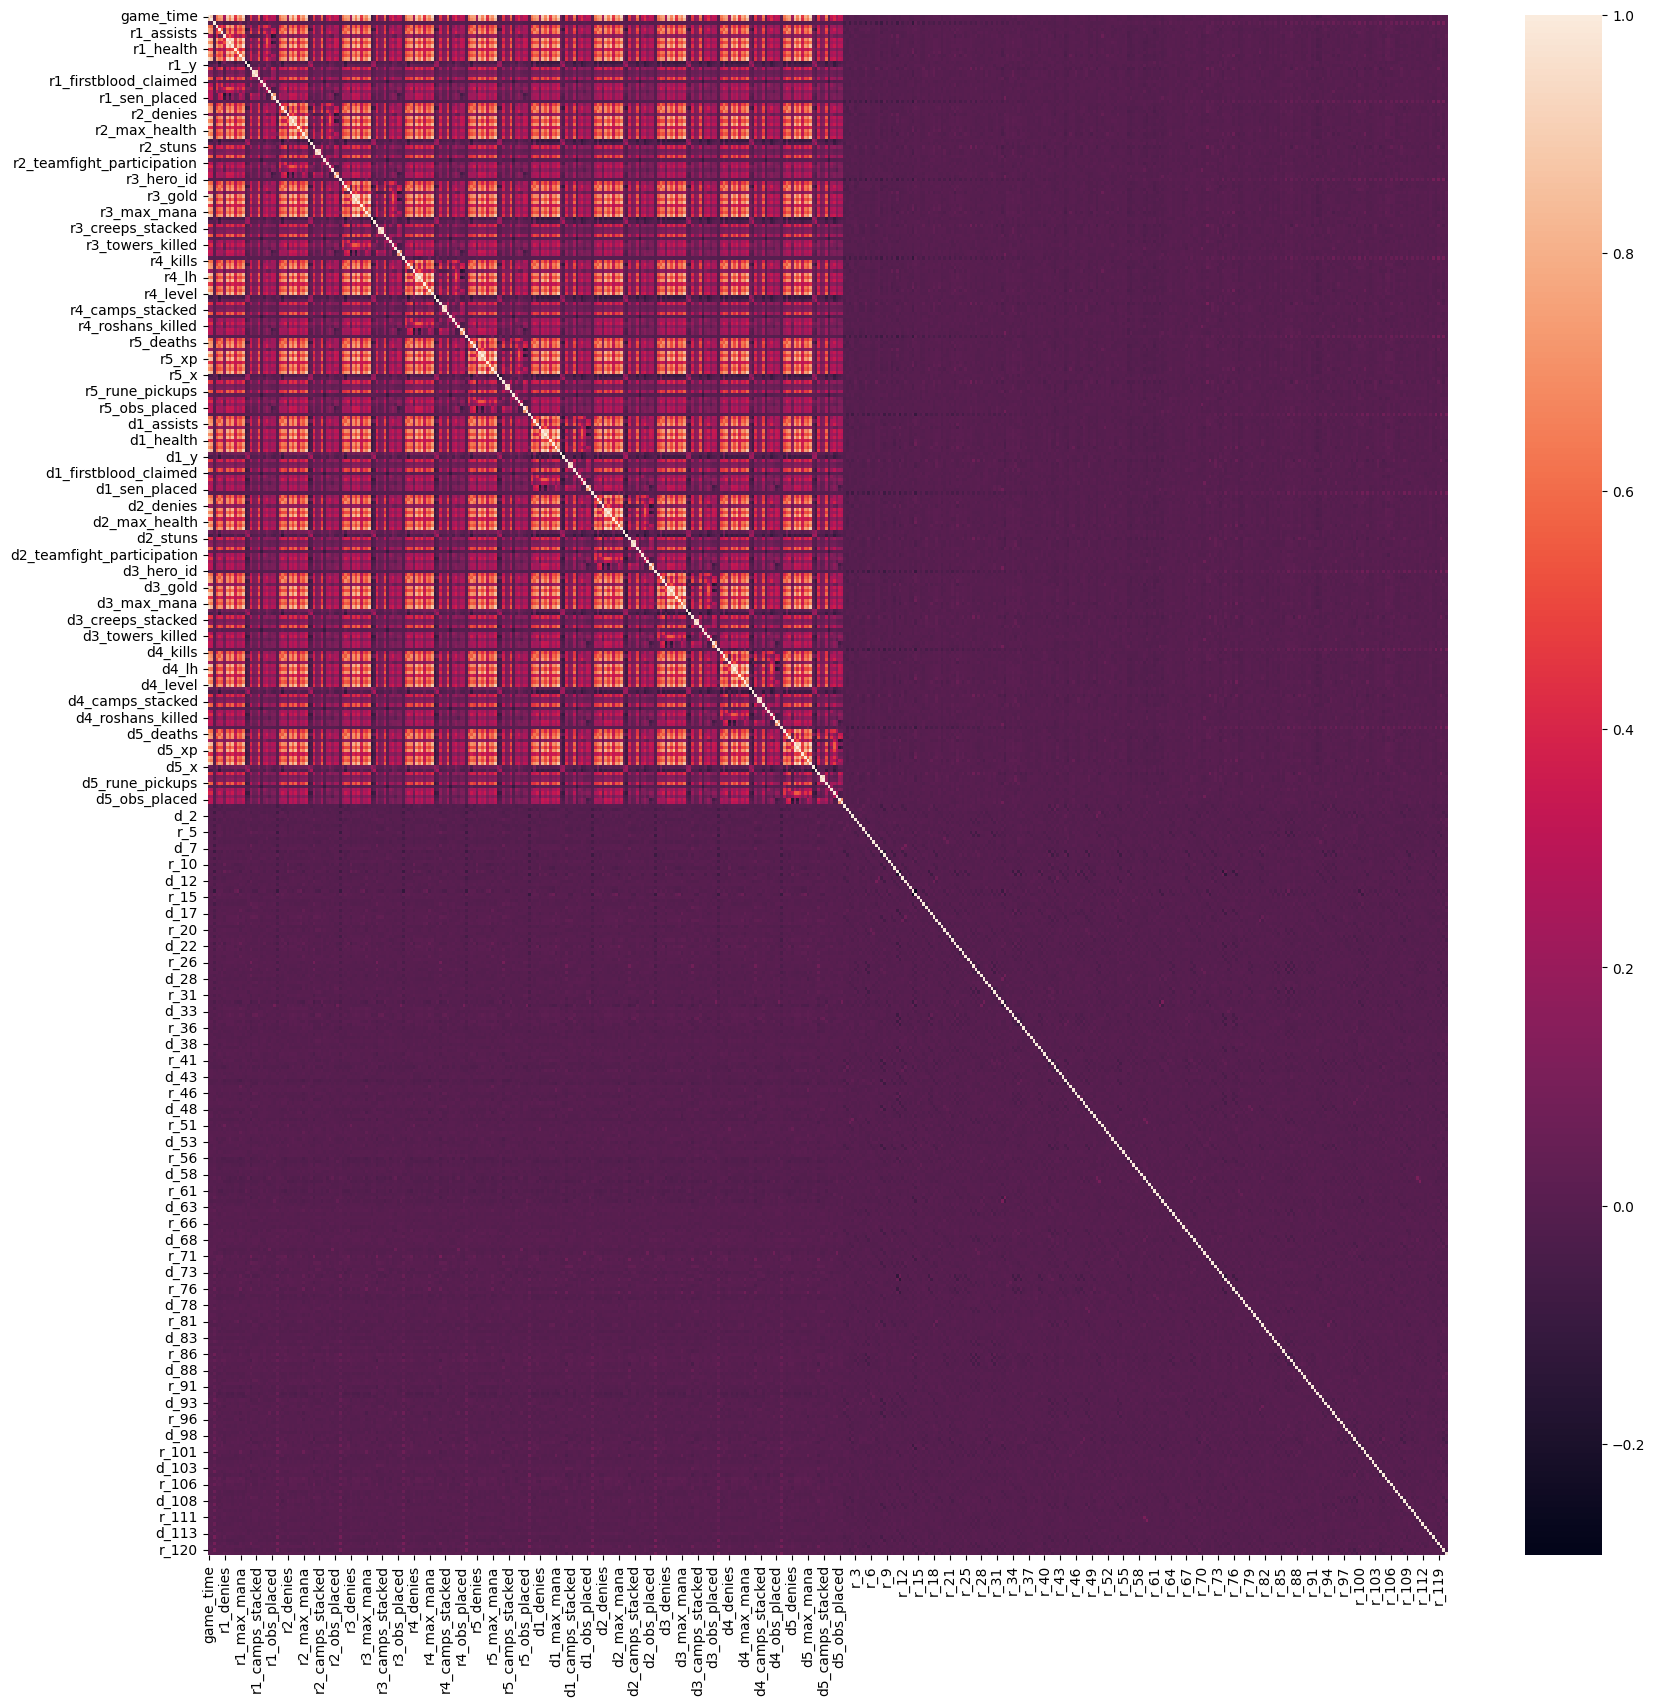

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(df_psth.corr())
plt.show()

In [2]:
df_tsth = teamstats_teamheros_transform(df.copy())

Hero Id Labels: ['r1_hero_id', 'r2_hero_id', 'r3_hero_id', 'r4_hero_id', 'r5_hero_id', 'd1_hero_id', 'd2_hero_id', 'd3_hero_id', 'd4_hero_id', 'd5_hero_id'] 

Numbers of Heros:  115 

NaN Count:  0 

Single Player Labels: ['r1_kills', 'r1_deaths', 'r1_assists', 'r1_denies', 'r1_gold', 'r1_lh', 'r1_xp', 'r1_health', 'r1_max_health', 'r1_max_mana', 'r1_level', 'r1_x', 'r1_y', 'r1_stuns', 'r1_creeps_stacked', 'r1_camps_stacked', 'r1_rune_pickups', 'r1_firstblood_claimed', 'r1_teamfight_participation', 'r1_towers_killed', 'r1_roshans_killed', 'r1_obs_placed', 'r1_sen_placed', 'r2_kills', 'r2_deaths', 'r2_assists', 'r2_denies', 'r2_gold', 'r2_lh', 'r2_xp', 'r2_health', 'r2_max_health', 'r2_max_mana', 'r2_level', 'r2_x', 'r2_y', 'r2_stuns', 'r2_creeps_stacked', 'r2_camps_stacked', 'r2_rune_pickups', 'r2_firstblood_claimed', 'r2_teamfight_participation', 'r2_towers_killed', 'r2_roshans_killed', 'r2_obs_placed', 'r2_sen_placed', 'r3_kills', 'r3_deaths', 'r3_assists', 'r3_denies', 'r3_gold', 'r

Hero Id Labels: ['r1_hero_id', 'r2_hero_id', 'r3_hero_id', 'r4_hero_id', 'r5_hero_id', 'd1_hero_id', 'd2_hero_id', 'd3_hero_id', 'd4_hero_id', 'd5_hero_id'] 

Numbers of Heros:  115 

Dataframe Shape: (32153, 463) 

NaN Count:  0 

Single Hero Labels: ['r1_kills', 'r1_deaths', 'r1_assists', 'r1_denies', 'r1_gold', 'r1_lh', 'r1_xp', 'r1_health', 'r1_max_health', 'r1_max_mana', 'r1_level', 'r1_x', 'r1_y', 'r1_stuns', 'r1_creeps_stacked', 'r1_camps_stacked', 'r1_rune_pickups', 'r1_firstblood_claimed', 'r1_teamfight_participation', 'r1_towers_killed', 'r1_roshans_killed', 'r1_obs_placed', 'r1_sen_placed', 'r2_kills', 'r2_deaths', 'r2_assists', 'r2_denies', 'r2_gold', 'r2_lh', 'r2_xp', 'r2_health', 'r2_max_health', 'r2_max_mana', 'r2_level', 'r2_x', 'r2_y', 'r2_stuns', 'r2_creeps_stacked', 'r2_camps_stacked', 'r2_rune_pickups', 'r2_firstblood_claimed', 'r2_teamfight_participation', 'r2_towers_killed', 'r2_roshans_killed', 'r2_obs_placed', 'r2_sen_placed', 'r3_kills', 'r3_deaths', 'r3_assist

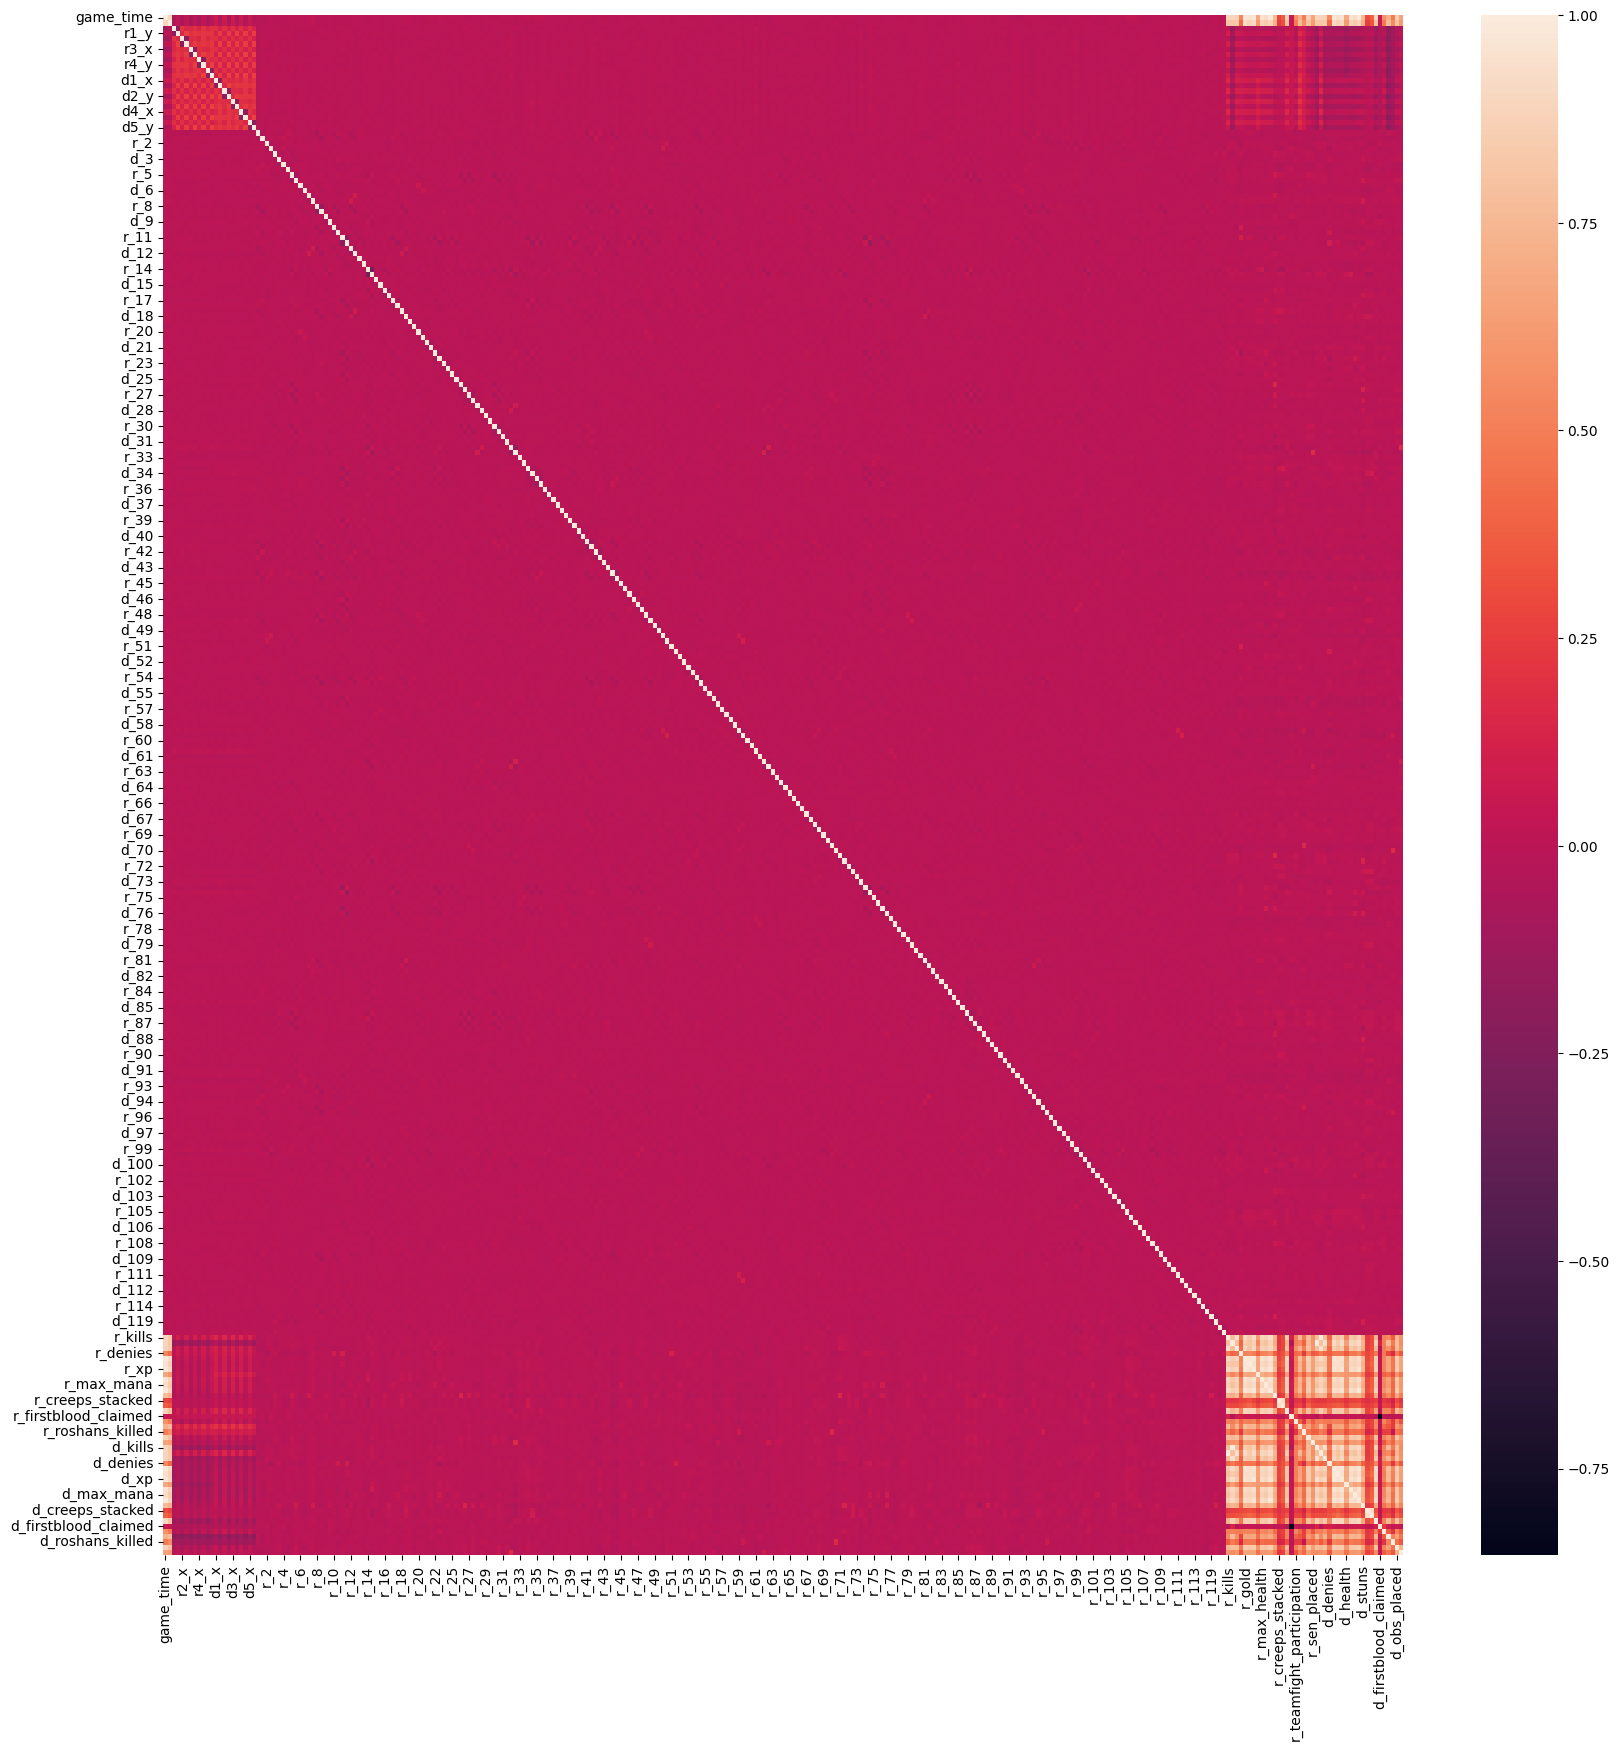

In [6]:
plt.figure(figsize=(20,20))
sns.heatmap(df_tsth.corr())
plt.show()

In [23]:
df_tsth = drop_heros_labels(df_tsth)
df_psth = drop_heros_labels(df_psth)
df_psph = drop_heros_labels(df_psph)

Hero Id Labels: [] 

Dropped Dataframe Shape: (32153, 64)
Hero Id Labels: [] 

Dropped Dataframe Shape: (32153, 232)
Hero Id Labels: [] 

Dropped Dataframe Shape: (32153, 1382)


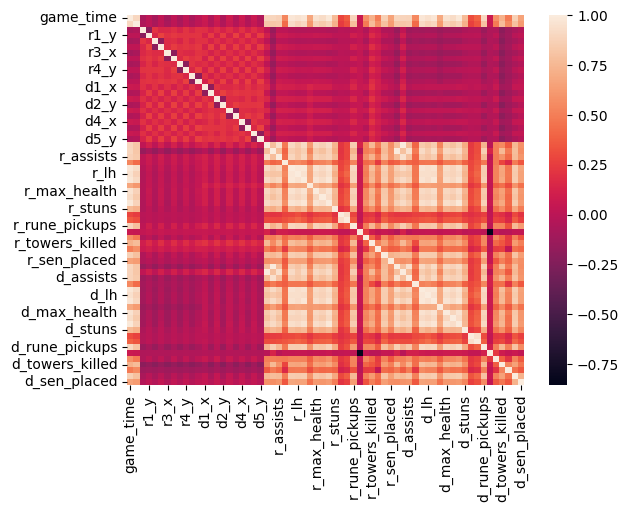

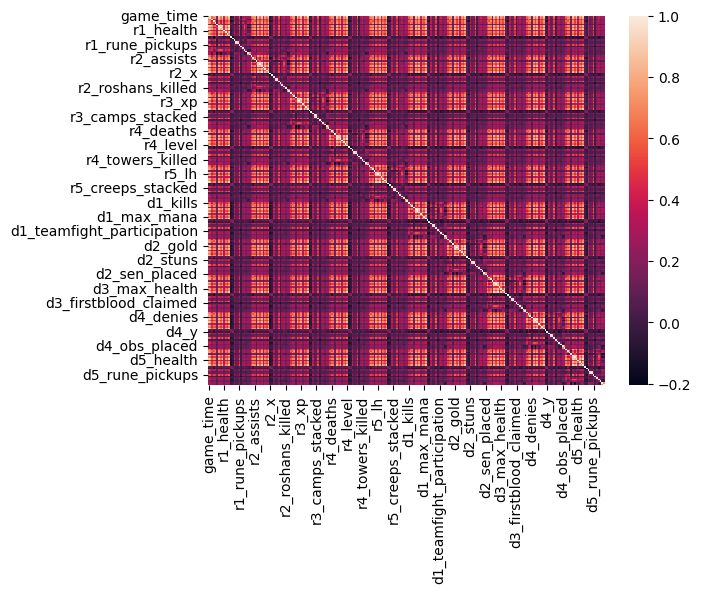

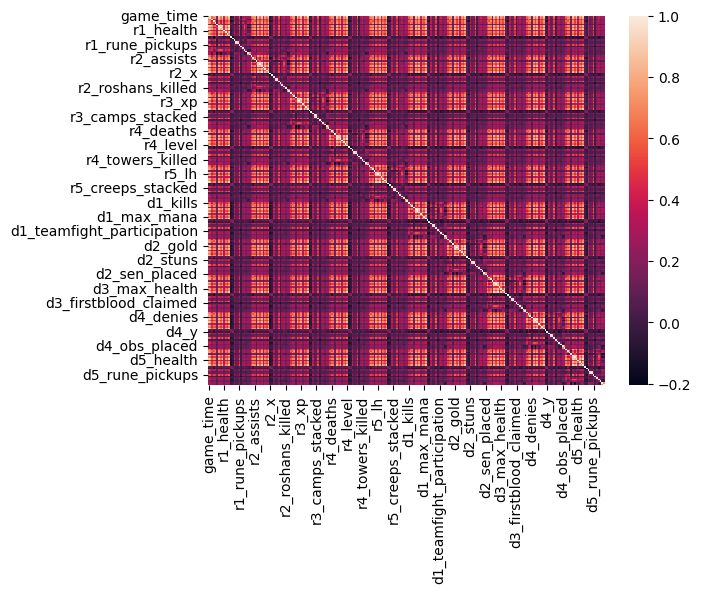

In [8]:
sns.heatmap(df_tsth.corr())
plt.show()
sns.heatmap(df_psth.corr())
plt.show()
sns.heatmap(df_psph.corr())
plt.show()

# Dimensionality Reduction - PCA and Kernel PCA

In [ ]:
scaler = StandardScaler()

n_components = 2

pca = PCA(n_components=n_components)
df_tsth_reduced_pca = pca.fit_transform(scaler.fit_transform(df_tsth))
print(df_tsth_reduced_pca.shape)


(32153, 2)


In [ ]:
scaler = StandardScaler()

n_components = 2

kpca = KernelPCA(n_components=n_components,kernel='rbf',eigen_solver='randomized')
df_tsth_reduced_kpca_rbf = kpca.fit_transform(scaler.fit_transform(df_tsth))
print(df_tsth_reduced_kpca_rbf.shape)

(32153, 2)


In [ ]:
scaler = StandardScaler()

n_components = 2

kpca = KernelPCA(n_components=n_components,kernel='sigmoid',gamma=1,eigen_solver='randomized')
df_tsth_reduced_kpca_sig = kpca.fit_transform(scaler.fit_transform(df_tsth))
print(df_tsth_reduced_kpca_sig.shape)

(32153, 2)


In [ ]:
scaler = StandardScaler()

n_components = 2

kpca = KernelPCA(n_components=n_components,kernel='cosine',eigen_solver='randomized')
df_tsth_reduced_kpca_cos = kpca.fit_transform(scaler.fit_transform(df_tsth))
print(df_tsth_reduced_kpca_cos.shape)

(32153, 2)


PCA


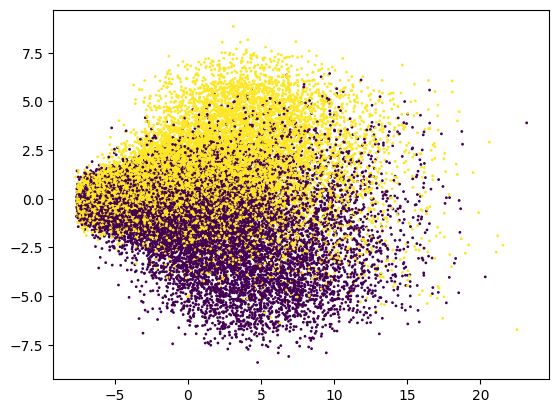

KPCA RBF


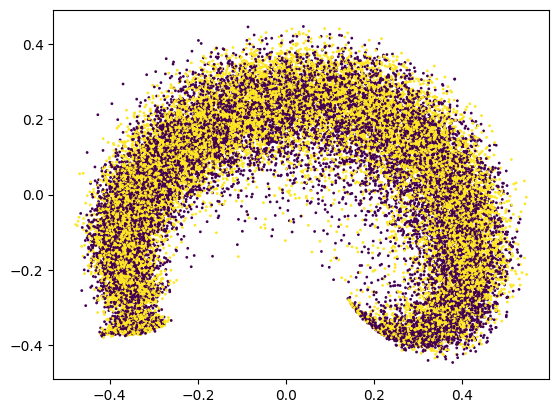

KPCA Sigmoid


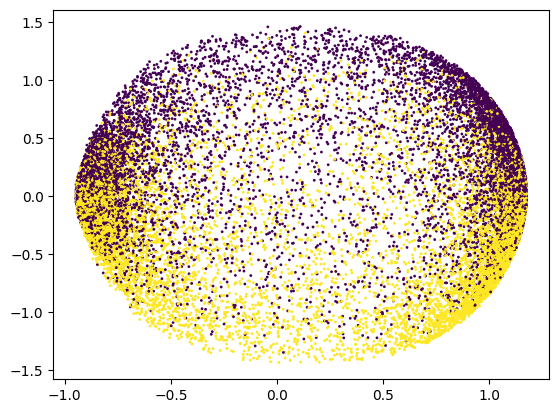

KPCA Cosine


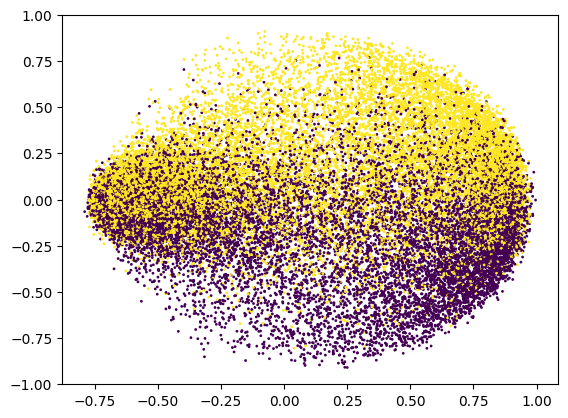

In [ ]:
print("PCA")
plt.scatter(df_tsth_reduced_pca[:,0],df_tsth_reduced_pca[:,1],c=target["radiant_win"].values,s=1)
plt.show()
print("KPCA RBF")
plt.scatter(df_tsth_reduced_kpca_rbf[:,0],df_tsth_reduced_kpca_rbf[:,1],c=target["radiant_win"].values,s=1)
plt.show()
print("KPCA Sigmoid")
plt.scatter(df_tsth_reduced_kpca_sig[:,0],df_tsth_reduced_kpca_sig[:,1],c=target["radiant_win"].values,s=1)
plt.show()
print("KPCA Cosine")
plt.scatter(df_tsth_reduced_kpca_cos[:,0],df_tsth_reduced_kpca_cos[:,1],c=target["radiant_win"].values,s=1)
plt.show()

# Variance Explanaition Ratio - PCA

### Heroes Dropped Manually

Hero Id Labels: ['r1_hero_id', 'r2_hero_id', 'r3_hero_id', 'r4_hero_id', 'r5_hero_id', 'd1_hero_id', 'd2_hero_id', 'd3_hero_id', 'd4_hero_id', 'd5_hero_id'] 

Numbers of Heros:  115 

NaN Count:  0 

Single Player Labels: ['r1_kills', 'r1_deaths', 'r1_assists', 'r1_denies', 'r1_gold', 'r1_lh', 'r1_xp', 'r1_health', 'r1_max_health', 'r1_max_mana', 'r1_level', 'r1_x', 'r1_y', 'r1_stuns', 'r1_creeps_stacked', 'r1_camps_stacked', 'r1_rune_pickups', 'r1_firstblood_claimed', 'r1_teamfight_participation', 'r1_towers_killed', 'r1_roshans_killed', 'r1_obs_placed', 'r1_sen_placed', 'r2_kills', 'r2_deaths', 'r2_assists', 'r2_denies', 'r2_gold', 'r2_lh', 'r2_xp', 'r2_health', 'r2_max_health', 'r2_max_mana', 'r2_level', 'r2_x', 'r2_y', 'r2_stuns', 'r2_creeps_stacked', 'r2_camps_stacked', 'r2_rune_pickups', 'r2_firstblood_claimed', 'r2_teamfight_participation', 'r2_towers_killed', 'r2_roshans_killed', 'r2_obs_placed', 'r2_sen_placed', 'r3_kills', 'r3_deaths', 'r3_assists', 'r3_denies', 'r3_gold', 'r

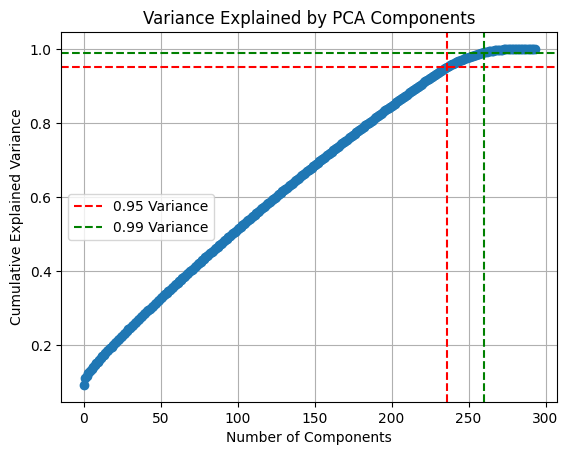

In [2]:
df_tsth = teamstats_teamheros_transform(df)

scaler = StandardScaler()
all_pca = PCA().fit(scaler.fit_transform(df_tsth))

cumulative_variance = np.cumsum(all_pca.explained_variance_ratio_)
plt.plot(cumulative_variance, marker='o')
plt.axhline(y=0.95, color='r', linestyle='--', label='0.95 Variance')
plt.axhline(y=0.99, color='g', linestyle='--', label='0.99 Variance')
plt.axvline(x=np.argmax(cumulative_variance >= 0.95), color='r', linestyle='--')
plt.axvline(x=np.argmax(cumulative_variance >= 0.99), color='g', linestyle='--')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Variance Explained by PCA Components")
plt.legend()
plt.grid()
plt.show()

### Feature Selection by Random Forest

Hero Id Labels: ['r1_hero_id', 'r2_hero_id', 'r3_hero_id', 'r4_hero_id', 'r5_hero_id', 'd1_hero_id', 'd2_hero_id', 'd3_hero_id', 'd4_hero_id', 'd5_hero_id'] 

Numbers of Heros:  115 

NaN Count:  0 

Single Player Labels: ['r1_kills', 'r1_deaths', 'r1_assists', 'r1_denies', 'r1_gold', 'r1_lh', 'r1_xp', 'r1_health', 'r1_max_health', 'r1_max_mana', 'r1_level', 'r1_x', 'r1_y', 'r1_stuns', 'r1_creeps_stacked', 'r1_camps_stacked', 'r1_rune_pickups', 'r1_firstblood_claimed', 'r1_teamfight_participation', 'r1_towers_killed', 'r1_roshans_killed', 'r1_obs_placed', 'r1_sen_placed', 'r2_kills', 'r2_deaths', 'r2_assists', 'r2_denies', 'r2_gold', 'r2_lh', 'r2_xp', 'r2_health', 'r2_max_health', 'r2_max_mana', 'r2_level', 'r2_x', 'r2_y', 'r2_stuns', 'r2_creeps_stacked', 'r2_camps_stacked', 'r2_rune_pickups', 'r2_firstblood_claimed', 'r2_teamfight_participation', 'r2_towers_killed', 'r2_roshans_killed', 'r2_obs_placed', 'r2_sen_placed', 'r3_kills', 'r3_deaths', 'r3_assists', 'r3_denies', 'r3_gold', 'r

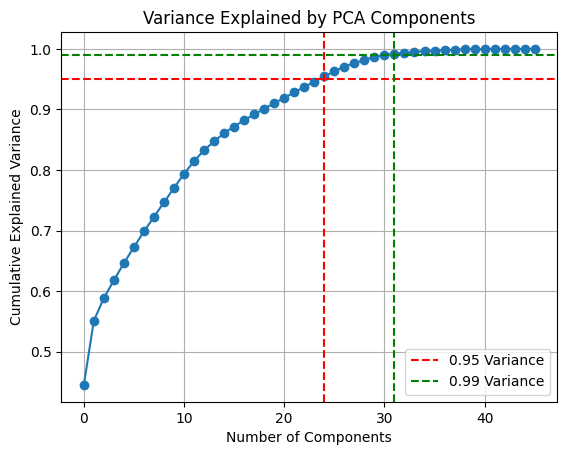

In [3]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_tsth = teamstats_teamheros_transform(df)

all_pca = PCA().fit(scaler.fit_transform(feature_selection_transform(df_tsth,target['radiant_win'],threshold=0.01)))

cumulative_variance = np.cumsum(all_pca.explained_variance_ratio_)
plt.plot(cumulative_variance, marker='o')
plt.axhline(y=0.95, color='r', linestyle='--', label='0.95 Variance')
plt.axhline(y=0.99, color='g', linestyle='--', label='0.99 Variance')
plt.axvline(x=np.argmax(cumulative_variance >= 0.95), color='r', linestyle='--')
plt.axvline(x=np.argmax(cumulative_variance >= 0.99), color='g', linestyle='--')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Variance Explained by PCA Components")
plt.legend()
plt.grid()
plt.show()

Shape Tranformation:
 (32153, 278) -> (32153, 31)


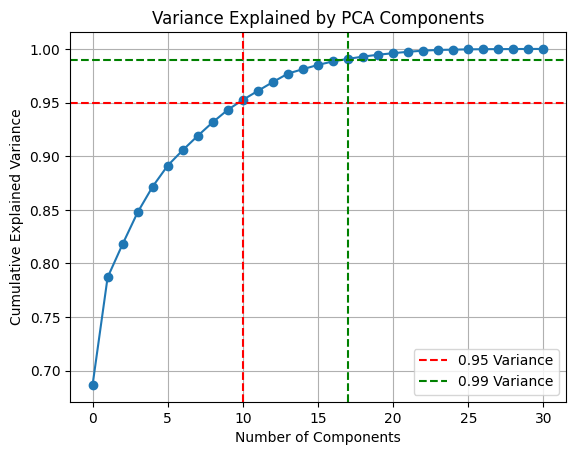

In [5]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_tsth_mp = team_mean_position_transform(df_tsth.copy())

all_pca = PCA().fit(scaler.fit_transform(feature_selection_transform(df_tsth_mp,target['radiant_win'],threshold=0.01)))

cumulative_variance = np.cumsum(all_pca.explained_variance_ratio_)
plt.plot(cumulative_variance, marker='o')
plt.axhline(y=0.95, color='r', linestyle='--', label='0.95 Variance')
plt.axhline(y=0.99, color='g', linestyle='--', label='0.99 Variance')
plt.axvline(x=np.argmax(cumulative_variance >= 0.95), color='r', linestyle='--')
plt.axvline(x=np.argmax(cumulative_variance >= 0.99), color='g', linestyle='--')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Variance Explained by PCA Components")
plt.legend()
plt.grid()
plt.show()

Hero Id Labels: ['r1_hero_id', 'r2_hero_id', 'r3_hero_id', 'r4_hero_id', 'r5_hero_id', 'd1_hero_id', 'd2_hero_id', 'd3_hero_id', 'd4_hero_id', 'd5_hero_id'] 

Numbers of Heros:  115 

NaN Count:  0 

Single Player Labels: ['r1_kills', 'r1_deaths', 'r1_assists', 'r1_denies', 'r1_gold', 'r1_lh', 'r1_xp', 'r1_health', 'r1_max_health', 'r1_max_mana', 'r1_level', 'r1_x', 'r1_y', 'r1_stuns', 'r1_creeps_stacked', 'r1_camps_stacked', 'r1_rune_pickups', 'r1_firstblood_claimed', 'r1_teamfight_participation', 'r1_towers_killed', 'r1_roshans_killed', 'r1_obs_placed', 'r1_sen_placed', 'r2_kills', 'r2_deaths', 'r2_assists', 'r2_denies', 'r2_gold', 'r2_lh', 'r2_xp', 'r2_health', 'r2_max_health', 'r2_max_mana', 'r2_level', 'r2_x', 'r2_y', 'r2_stuns', 'r2_creeps_stacked', 'r2_camps_stacked', 'r2_rune_pickups', 'r2_firstblood_claimed', 'r2_teamfight_participation', 'r2_towers_killed', 'r2_roshans_killed', 'r2_obs_placed', 'r2_sen_placed', 'r3_kills', 'r3_deaths', 'r3_assists', 'r3_denies', 'r3_gold', 'r

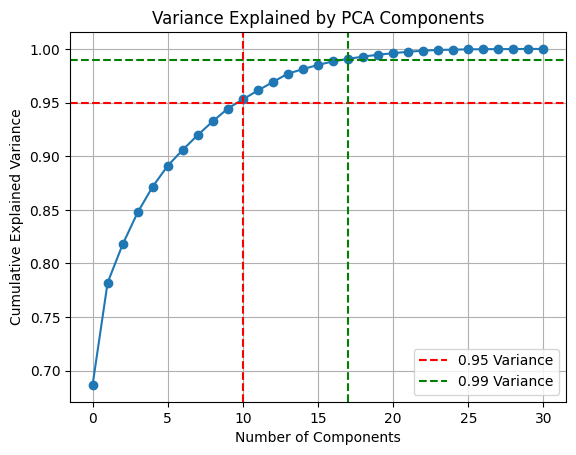

In [2]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_tsth = teamstats_teamheros_transform(df)

df_tsth_wmp = team_weighted_mean_position_transform(df_tsth.copy())

all_pca = PCA().fit(scaler.fit_transform(feature_selection_transform(df_tsth_wmp,target['radiant_win'],threshold=0.01)))

cumulative_variance = np.cumsum(all_pca.explained_variance_ratio_)
plt.plot(cumulative_variance, marker='o')
plt.axhline(y=0.95, color='r', linestyle='--', label='0.95 Variance')
plt.axhline(y=0.99, color='g', linestyle='--', label='0.99 Variance')
plt.axvline(x=np.argmax(cumulative_variance >= 0.95), color='r', linestyle='--')
plt.axvline(x=np.argmax(cumulative_variance >= 0.99), color='g', linestyle='--')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Variance Explained by PCA Components")
plt.legend()
plt.grid()
plt.show()